# Navigation

---


### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# No Visual environment is better to train
env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")

# To run the visual environment uncomment the next line and comment the earlier line
#env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Training

Following yields the code to train an agent using **Deep Q-Learning** or **Double Deep Q-Learning**.
Here you can select the parameter related to the epsilon-greedy policies and the number of episodes.

In [5]:
import torch
from dqn_agent import Agent
from collections import deque


def train_agent(agent, n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """ Train an agent using Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        score = 0
        while True:
            state = env_info.vector_observations[0]  # get the current state
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)  # this statement launches the learning phase
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

#scores = dqn()

def show_agent_performance(scores):
    """ Show the score of obtained by an agent during his training phase"""
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

#### 3.1 Train a DQN agent

Episode 100	Average Score: 1.06
Episode 200	Average Score: 4.21
Episode 300	Average Score: 5.92
Episode 400	Average Score: 8.28
Episode 500	Average Score: 11.23
Episode 553	Average Score: 13.05
Environment solved in 453 episodes!	Average Score: 13.05


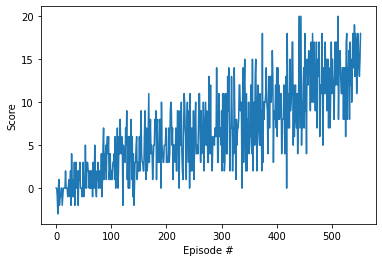

In [6]:
dqn_agent = Agent(state_size=37, action_size=4, hidden_layers=[18,9], p_drop=0, seed=0)
scores_simple = train_agent(dqn_agent)
show_agent_performance(scores_simple)

#### 3.2 Train a Double DQN agent

Episode 100	Average Score: 0.80
Episode 200	Average Score: 4.20
Episode 300	Average Score: 9.14
Episode 400	Average Score: 10.21
Episode 500	Average Score: 11.30
Episode 581	Average Score: 13.03
Environment solved in 481 episodes!	Average Score: 13.03


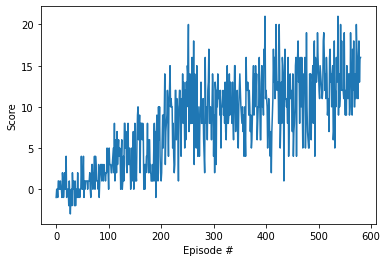

In [7]:
double_dqn_agent = Agent(state_size=37, action_size=4, hidden_layers=[18,9], double_dqn = False,  p_drop=0, seed=0)
scores_double = train_agent(double_dqn_agent)
show_agent_performance(scores_double)

When finished, you can close the environment.

In [8]:
env.close()

#### 3.3 Comparison and performance plots

This codes has the only purpose to sho create plt for the report and show the results of the trained agents

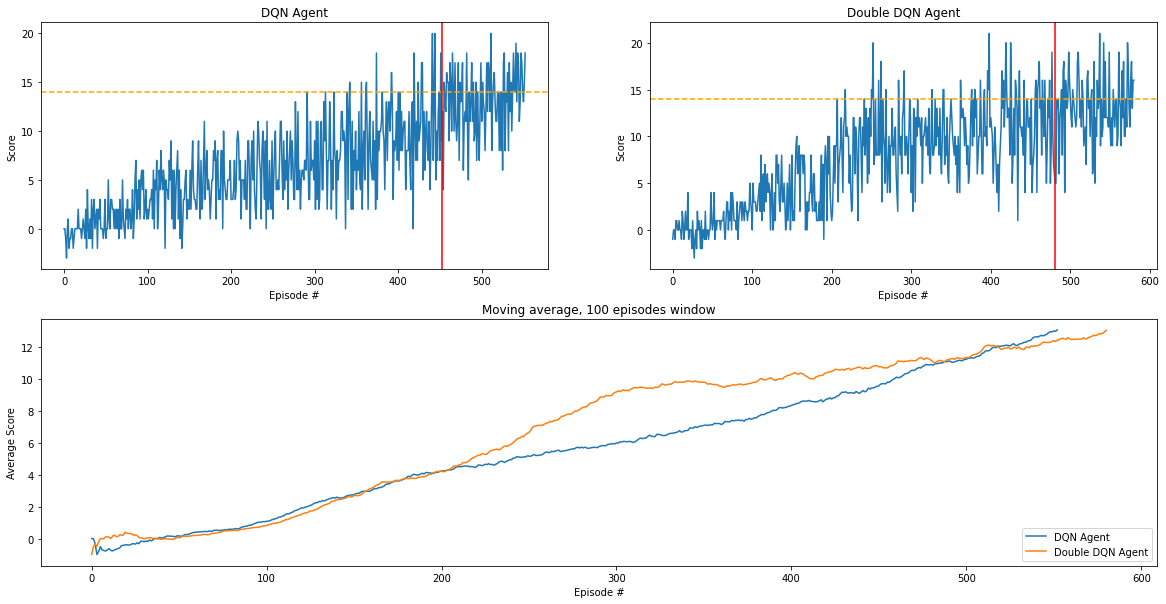

In [91]:
plt.rcParams["figure.figsize"] = (20,10)

# moving avergae for both agents
moving_average_simple = [np.mean(scores_simple[max(0,i-99):i+1])for i in range(len(scores_simple))]
moving_average_double = [np.mean(scores_double[max(0,i-99):i+1])for i in range(len(scores_double))]

# plot the scores
succesful_episode = len(scores_simple)-100
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
plt.plot(np.arange(len(scores_simple)), scores_simple)
plt.axhline(y=14, color='orange', linestyle='--')
plt.axvline(x=succesful_episode, color='red', linestyle='-')
ax.title.set_text('DQN Agent')
plt.ylabel('Score')
plt.xlabel('Episode #')

succesful_episode = len(scores_double)-100
ax = fig.add_subplot(2,2,2)
plt.plot(np.arange(len(scores_double)), scores_double)
plt.axhline(y=14, color='orange', linestyle='--')
plt.axvline(x=succesful_episode, color='red', linestyle='-')
ax.title.set_text('Double DQN Agent')
plt.ylabel('Score')
plt.xlabel('Episode #')

ax = fig.add_subplot(2,1,2)
ax.title.set_text('Moving average, 100 episodes window')
plt.plot(moving_average_simple, label='DQN Agent')
plt.plot(moving_average_double, label='Double DQN Agent')
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.legend(loc='lower right')

plt.show()

## 4.Saving the models

Save the obtained models.

In [9]:
# Save DQN model
checkpoint = {'state_size': 37,
              'action_size': 4,
              'hidden_layers':[18,9], 
              'p':0, 
              'seed':0,
              'state_dict': dqn_agent.qnetwork_target.state_dict()}

torch.save(checkpoint, './saved_models/dqn_agent_model.pth')

In [10]:
# Save the Double DQN model
checkpoint = {'state_size': 37,
              'action_size': 4,
              'hidden_layers':[18,9], 
              'p':0, 
              'seed':0,
              'state_dict': double_dqn_agent.qnetwork_target.state_dict()}

torch.save(checkpoint, './saved_models/double_dqn_agent_model.pth')